<a href="https://colab.research.google.com/github/tanushreevijay/Mini-projects/blob/main/miniproj1num.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tensorflow

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Okay so let's go over the steps for CNN:
First, we need to Load the datasets and normalize them. In this case, we're using MNIST and each pixel value in the images vary from 0 to 255. So to make sure the pixel value is between 0 and 1, we must normalize by diving the train and test values by 255.



Evaluate and test.

Save the model.

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Next, we need to build the CNN model. To do that, we'll first create a linear stack of the layers in our CNN. The feature extraction using conv2D. ReLu to convert linear to non-linear.

Then, pooling to reduce spatial dimensions of the feature maps (size reduction for computational purposes)

Flattening to convert 2D array to 1D vector.

Then, Dense; a fully connected layer where every neuron is connected to all neurons in the previous layer. 128: Number of neurons in this layer. ReLu again.

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and train our CNN model.
Compile and fit.

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train[..., None], y_train, epochs=5, validation_data=(x_test[..., None], y_test))
test_loss, test_acc = model.evaluate(x_test[..., None], y_test)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 26ms/step - accuracy: 0.9013 - loss: 0.3272 - val_accuracy: 0.9788 - val_loss: 0.0654
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 22ms/step - accuracy: 0.9821 - loss: 0.0578 - val_accuracy: 0.9851 - val_loss: 0.0489
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - accuracy: 0.9895 - loss: 0.0337 - val_accuracy: 0.9822 - val_loss: 0.0533
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9931 - loss: 0.0215 - val_accuracy: 0.9857 - val_loss: 0.0431
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9872 - val_loss: 0.0407
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9834 - loss: 0.0525
Test accuracy: 0.9872000217437744


Save the model.

In [10]:
model.save("digitrecogonizer.h5")

test it out with an image

Saving threehandwritten.png to threehandwritten.png


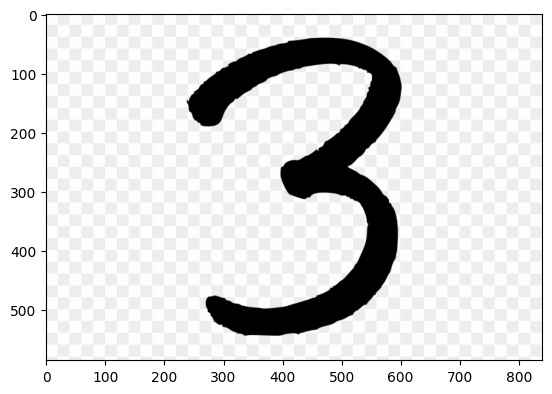

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Digit: 3


In [11]:
from google.colab import files
from PIL import Image
uploaded = files.upload()
image = Image.open(r"threehandwritten.png")

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')
plt.show()

image = image.convert("L")
image = image.resize((28, 28))

image_array = np.array(image) / 255.0
image_array = image_array.reshape(1, 28, 28, 1)

predictions = model.predict(image_array)
predicted_digit = np.argmax(predictions)
print(f"Predicted Digit: {predicted_digit}")
